# Chapter 3 Understanding and Preparing Data

Most ML work is in gathering and preparing the data. The better/cleaner your data the better the results will be. 

### 3.1 Types of Data

Numerican Data

- Continuous
    - Can take any value within a range (height, temp, income)
- Discrete
    - Only whole numbers, often counts of things

In [9]:
import pandas as pd

df = pd.DataFrame({
    "height_cm":[160,175,180,155],
    "age":[25,32,40,29],
    "children":[2,1,3,0]
})

print(df.dtypes)

height_cm    int64
age          int64
children     int64
dtype: object


### Categorical Data

- Nominal
    - No intrinsic order (colors, city names)
- Ordinal
    - Natural order (Education level)

### Page 52

In [4]:
import pandas as pd

df = pd.DataFrame({
    "city":["New York", "London", "Tokyo", "London"],
    "education":["Bachelor's", "Master's", "PhD", "High School"]
})

# Deduplicate
print(df["city"].unique())
print(df["education"].unique())

['New York' 'London' 'Tokyo']
["Bachelor's" "Master's" 'PhD' 'High School']


### Text Data

Unstructured text data like reviews, tweet, emails, etc...

In [6]:
df = pd.DataFrame({
    "review":[
        "Amazing product! Loved it.",
        "Terrible service.",
        "Would buy again.",
        "Not worth the price."
    ]
})

print(df)
print("\n")
print(df.dtypes)

                       review
0  Amazing product! Loved it.
1           Terrible service.
2            Would buy again.
3        Not worth the price.


review    object
dtype: object


### Date and Time Data

Temporal information

In [7]:
df = pd.DataFrame({
    "signup_date": pd.to_datetime(["2023-01-01","2022-11-10","2023-05-22","2021-07-30"]),
    "duration_days":[14,35,7,60]
})

print(df.dtypes)

signup_date      datetime64[ns]
duration_days             int64
dtype: object


### Boolean Data

In [8]:
df = pd.DataFrame({
    "subscribed":[True, False, True, False]
})

print(df["subscribed"].sum()) # Count how many are True/Subscribed

2


### Mixed and Structure Data

- Always use `.dtypes` in pandas to check column types.
- For ML, convert categories and Dates to numbers
- Use visualizations to check for outliers and understand distributions

Proper data type is the foundation, otherwise results maybe confusing or errneous.

### Importing and Loading Datasets

CSV is the most common method to load data.

In [ ]:
import pandas as pd

df = pd.read_csv("sample_data.csv")
print(df.head()) # Just shows the first 5 rows as a sanity check

# pandas assumes the first row contain column names

If you file uses a specific delimiter you can specify with `sep='\t'`

`df = pd.read_csv("sample_data.csv", sep="\t")`

or 

`df = pd.read_csv("sample_data.csv", sep=",")`

etc...

For missing headers use `header=None`

`df = pd.read_csv("sample_data.csv", header=None)`

At this point you can assign column names after the fact:

`df.columns = ["col1", "col2", "col3"]`

In [ ]:
import pandas as pd

df = pd.read_csv("sample_data.csv", sep=',', header=None)
df.columns = ["NewName", "NewAge", "NewScore"]
print(df.head())

### Loading Excel Files

In [ ]:
df = pd.read_excel("budget.xlsx", sheet_name="2023")
print(df.head())

# list all sheets in the xlsx
sheeds = pd.ExcelFile("budget.xlsx")
print(sheets.sheed_names)

### Loading Data from Databases

In [ ]:
import sqlite3

conn = sqlite3.connect("company.db")
df = pd.read_sql("SELECT * FROM employees", conn)
conn.close()
print(df.head())

### Loading Data from a Website

In [ ]:
url = "https://www.something.com/files/iris.cvs"

df = pd.read_csv(url)
print(df.head())

### Loading Built-in Datasets from Scikit Learn

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame
print(df.head())

# Check data after loading
print(df.shape)
print(df.info())
print(df.columns)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
0                5.1               3.5                1.4               0.2       0
1                4.9               3.0                1.4               0.2       0
2                4.7               3.2                1.3               0.2       0
3                4.6               3.1                1.5               0.2       0
4                5.0               3.6                1.4               0.2       0
(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 

Inspect your data and look for:

- missing values
- weird data types (num as str)
- unexpected columns

### Dealing with large datasets

- When working with massive datasets we can load in with chunks

In [ ]:
chunk_iter = pd.read_csv("big_data.csv", chunksize=10000)

for chunk in chunk_iter:
    print(chunk.shape)

- Keep raw data in a `data` folder
- Use clear and consistent naming for files and columns
- Always check data immediately after loading

### Handling Missing Values

Most ML algorithms cannot handle missing values, this will either error out for silently skip the row which will throw off the predictions.

### Find missing data

In [ ]:
# step 1 after loading data is to check for missing values

# always inspect your data

import pandas as pd

df = pd.read_cvs("customers.csv")
# grab the number of missing values per column
print(df.isnull().sum())

# Does each column have any missing values?
print(df.isnull().any())

# Check for gaps quickly, this will return non-null counts per column
print(df.info())

### Handling Missing Values

In [ ]:
# 1 - Drop the missing values

# Drop rows with missing values
df_clean = df.dropna()

# Drop columns with missing values
df.clean_cols = df.dropna(axis=1)

### Fill missing values (imputation)

In [ ]:
# Fill missing data in with 0's

df["age"] = df["age"].fillna(0)

# Fill with the mean or median (Great for numerical columns)
df["income"] = df["income"].fillna(df["income"].mean())

# Fill with the most common value for categories
df["city"] = df["city"].fillna(df["city"].mode()[0])

# For time stamped data use the value before or after
# Forward Fill
df["temperature"] = df["temperature"].fillna(method="ffill")

# Backward fill
df["temperature"] = df["temperature"].fillna(method="bfill")

### Flag Missing Data

In [ ]:
# Sometimes knowing the value is missing tells you something

df["age_missing"] = df["age"].isnull()
df["age"] = df["age"].fillna(df["age"].mean())

### Handling missing values for Machine Learning

Many models do not accept missing values, always fill or remove them.

### Top of page 62

Scikit learn can use transformers to advanced imputation.



In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean") # "median" or "most_frequent" or "constant" also work
df[["income"]] = imputer.fit_transform(df[["income"]])

### Visualizing Missing Data

<Axes: >

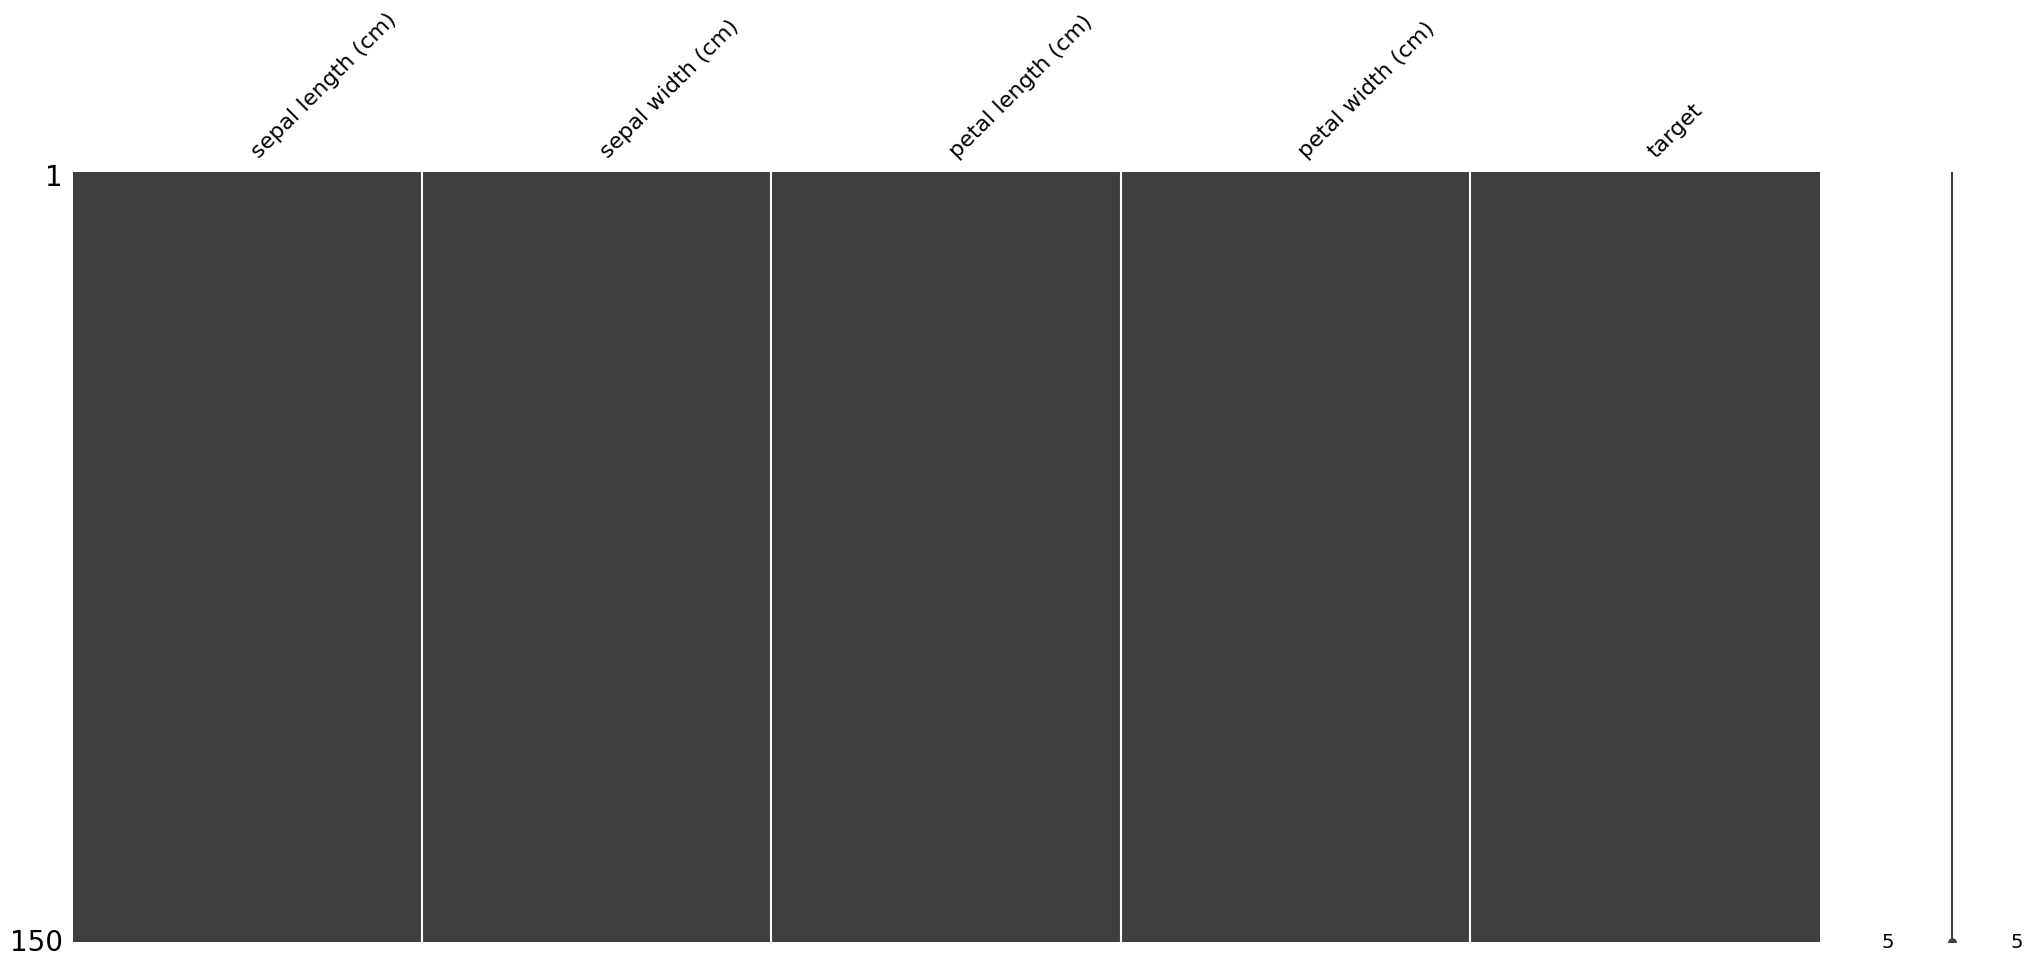

In [ ]:
# !pip install missingno
import missingno as msno
msno.matrix(df) # Visualize the missing data using the missingno package

### Choose the right approach

- small, random gaps
    - Drop or fill with mean/median/mode
- patterns or large gaps
    - understand why values are missing, filling these in may introduce bias in the training
- categories
    - Fill with mode or "Unknown"
- Time series
    - Forward/Backward fill


### Data Cleaning Essentials

### Removing duplicates

In [ ]:
import pandas as pd

df = pd.read_csv("sales.csv")
print("Before:", df.shape)
df = df.drop_duplicates() # dedupe
print("After:", df.shape)

### Fixing Inconsistent Data

In [ ]:
df["city"] = df["city"].str.strip().str.title()
df["city"] = df["city"].replace({
    "Ny": "New York",
    "N.Y.": "New York"
})

### Handling Outliers

In [ ]:
# Visualize First
import matplotlib.pyplot as plt
plt.host(df["amount"], bins = 50)
plt.show()

# Remove or CLip
df = df[df["amount"] < 10"000] # Remove extreme values
df["amount"] = df["amount"].clip(upper = 5000) # Cap values

### Dealing with Inconsistent Data Types

In [ ]:
# Convert to numeric
df["sales"] = pd.to_numeric(df["sales"], errors = "coerce")

# Convert to category for efficiency
df["product"] = df["product"].astype("category")

### Trimming Whitespace and Handling Case Sensitivity

In [ ]:
df["customer"] = df["customer"].str.strip().str.title()

### Filling in or Flagging Missing Values

In [ ]:
# This can be used with inconsistent dtypes and trimming/clipping to keep track of what values were filled

df["age_missing"] = df["age"].isnull()
df["age"] = df["age"].fillna(df["age"].mean())

### Removing Irrelevant Features

Not every column is useful for models, ID's Notes etc...

SIMPLER DATASETS = BETTER DATASETS

In [ ]:
df = df.drop(columns=["internal_notes","id"])

### Checking for Consistency and Logic

Remove things that don't make any sense like a purchase date that is after the thing you purchased it for

In [ ]:
df = df[df["age"] >= 0]
df = df[df["purchase_date"] >= df["signup_date"]]

### File Checklist for Clean Data

- no dupes
- no obvious errors
- consistent formatting for categories, numbers, dates
- reasonable ranges (negative sales numbers, ages etc...)
- irrelevant columns removed
- Missing values handled or flagged

Clean data is king

In [ ]:
import pandas as pd
import missingno as msno


df = pd.read_csv("data/dirty/dirty_cafe_sales.csv")

# Check for blanks
msno.matrix(df)

# Check Head
print("\n------------Head------------\n")
print(df.head())

# Check Shape
print("\n------------Shape------------\n")
print(df.shape)

# Get Info
print("\n------------Info------------\n")
print(df.info())

# Check Columns
print("\n------------Columns------------\n")
print(df.columns)

# Check Missing Values Per Column
print("\n------------Columns isnull sum------------\n")
print(df.isnull().sum())

# Check If Each Column Has Missing Values
print("\n------------Columns isnull any------------\n")
print(df.isnull().any())

# Backward Fill Dates
print("\n------------bfill Dates------------\n")
df["Transaction Date"] = df["Transaction Date"].fillna(method="bfill")

# Get Info
print("\n------------Info------------\n")
print(df.info())

# Set missing Location, Payment Method, and Item to UNKNOWN
print("\n------------bfill Dates------------\n")
df["Location"] = df["Location"].fillna("UNKNOWN")
df["Payment Method"] = df["Payment Method"].fillna("UNKNOWN")
df["Item"] = df["Item"].fillna("UNKNOWN")

# Get Info
print("\n------------Info------------\n")
print(df.info())

# Fix Quantity, Price Per Unit, Total Spent or if Numerical Columns have NaN
df["Quantity"] = df["Quantity"].fillna(df["Quantity"].mode()[0])
#df["Price Per Unit"] = df["Price Per Unit"].fillna(df["Price Per Unit"].mean())
#df["Total Spent"] = df["Total Spent"].fillna(df["Total Spent"].mean())
df = df.dropna(subset=['Quantity'])
df = df.dropna(subset=['Price Per Unit'])
df = df.dropna(subset=['Total Spent'])
df = df.dropna()

# Check Head
print("\n------------Head------------\n")
print(df.head())

# Check Shape
print("\n------------Shape------------\n")
print(df.shape)

# Get Info
print("\n------------Info------------\n")
print(df.info())

# Check for blanks
msno.matrix(df)


### Basic Feature Engineering

**Feature Engineering** = Transform Raw Data into Meaningful Inputs

Feature engineering is more impactful than the model itself.

### What is feature engineering?

Creating new variables (features) or modifying existing ones to make your data more useful.

### Combine or Transform Columns, Creating new features from existing data

In [ ]:
df["full_name"] = df["first_name"] + " " + df["last_name"]

# Or create a BMI column from height and weight

df["bmi"] = df["weight_kg"] / (df["height_cm"] / 100) ** 2

### Extract Parts of a Date

In [ ]:
# extract patterns from dates into their own features(columns)

df["signup_date"] = pd.to_datetime(df["signup_date"]) 
df["signup_year"] = df["signup_date"].dt.year 
df["signup_month"] = df["signup_date"].dt.month 
df["signup_dayofweek"] = df["signup_date"].dt.dayofweek

### Binning Continuous Variables

Convert a continuous feature like age or income into bins or categories can help simplify analysis.

Useful for uncoivering non-linear effects or reducing the impact of outliers

In [ ]:
df["age_group"] = pd.cut(df]"age"], bins = [0, 18, 35, 50, 100], labels = ["Child", "Young Adult", "Adult", "Senior"])

### Encoding Categorical Variables

Machine learning needs numbers not words, convert categories into numerical codes:

### One-Hot Encoding

Creates a new column for each category values for non-ordinal( no inherent order to it) date.

```python
df = pf.get_dummies(df, columns=["city"])
```

### Label Encoding

Assign a category a number

You do need to be careful as numbers can introduce artificial relationship between features

```python
df["education_level"] = df["education"].map({"High School": 0, "Bachelor": 1, "Master": 2, "PhD": 3})
```

### Creating Interaction Features

Combining 2 features can be more beneficial then two stand alone features, like age and income

```python
df["age_income"] = df["age"] * df["income"]
```

### Feature Scaling

Put features on a common scale, this can help many algorithms

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["income_scaled"]] = scaler.fit_transform(df[["income"]])
```

### Practical Example

### Dataset

```python
data = {
    "age": [25, 37, 29, 52],
    "income": [50000, 64000, 57000, 83000],
    "city": ["New York", "London", "London", "New York"]
}

df = pd.DataFrame(data)
```

### Now lets engineer features

```python
# Binning age
df["age_group"] = pd.cut(df["age"], bins=[0, 30, 50, 100], labels=["Young", "Middle", "Senior"])

# Encoding city with one-hot encoding
df = pd.get_dummies(df, columns=["city"]) print(df)
```






### Why Feature Engineering Matters

- improves model performance
- Add interpretability
    - human friendly
- ecodes domain knowledge
    - bake into the data what is important

### Key takeaways

- feature engineering turns raw data in meaningful model ready features
- Combine columns, extract info from dates, binning, encoding categories, scaling
- Thoughtful features matter more than algorithms
- Start simple, then build features to help you see more data

